<a href="https://colab.research.google.com/github/jahanshukhy/Intro-to-Machine-Learning/blob/main/Allthreevariables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# import D3.csv from the Drive
file_path = '/content/drive/My Drive/ML/HW1/D3.csv'
sample = pd.DataFrame(pd.read_csv(file_path))
sample.head()

,X1,X2,X3,Y
0,0.000000,3.440000,0.440000,4.387545
1,0.040404,0.134949,0.888485,2.679650
2,0.080808,0.829899,1.336970,2.968490
3,0.121212,1.524848,1.785455,3.254065
4,0.161616,2.219798,2.233939,3.536375


In [3]:
# Define explanatory varialbles (X1,X2,X3), output(Y), and the sample training numbers

X = sample[["X1","X2","X3"]].values
y = sample["Y"].values
m = len(y)  # Number of training examples
n = len(X)  # Number of training examples

# Display all the data and the total number of training examples
print('X = ', X[: 100])
print('y = ', y[: 100])
print('m = ', m)
print('n = ', n)



X =  [[0.         3.44       0.44      ]
 [0.04040404 0.1349495  0.88848485]
 [0.08080808 0.82989899 1.3369697 ]
 [0.12121212 1.52484848 1.78545454]
 [0.16161616 2.21979798 2.23393939]
 [0.2020202  2.91474747 2.68242424]
 [0.24242424 3.60969697 3.13090909]
 [0.28282828 0.30464646 3.57939394]
 [0.32323232 0.99959596 0.02787879]
 [0.36363636 1.69454546 0.47636364]
 [0.4040404  2.38949495 0.92484849]
 [0.44444444 3.08444444 1.37333333]
 [0.48484848 3.77939394 1.82181818]
 [0.52525252 0.47434343 2.27030303]
 [0.56565657 1.16929293 2.71878788]
 [0.60606061 1.86424242 3.16727273]
 [0.64646465 2.55919192 3.61575758]
 [0.68686869 3.25414141 0.06424242]
 [0.72727273 3.94909091 0.51272727]
 [0.76767677 0.6440404  0.96121212]
 [0.80808081 1.3389899  1.40969697]
 [0.84848485 2.03393939 1.85818182]
 [0.88888889 2.72888889 2.30666667]
 [0.92929293 3.42383838 2.75515152]
 [0.96969697 0.11878788 3.20363636]
 [1.01010101 0.81373737 3.65212121]
 [1.05050505 1.50868687 0.10060606]
 [1.09090909 2.20363636

In [ ]:
X_0 = np.ones((m, 1)) #define X0 as column vector with value 1
X_0[:100]

In [ ]:
X_1 = X.reshape(m, 3) #Insert X1,X2,X3 value in one matrix
X_1[:100]

In [ ]:
# Build X as a 2D array matrix with X0 and X1
X = np.hstack((X_0, X_1))
X[:100]

In [7]:
theta = np.zeros(4)
theta

array([0., 0., 0., 0.])

In [8]:
def compute_cost(X, y, theta):
    predictions = X.dot(theta) #hypothesis function
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    J = 1 / (2 * m) * np.sum(sqrErrors)
    return J

In [9]:
# calculate the cost for theta values
cost = compute_cost(X, y, theta)
print('The cost for given values of theta_0 and theta_1 =', cost)

The cost for given values of theta_0 and theta_1 = 5.524438459196242


In [30]:
def gradient_descent(X, y, theta, alpha, iterations):

    m = len(y)  # Number of training examples
    cost_history = np.zeros(iterations)

    for i in range(iterations):
        predictions = X.dot(theta)
        errors = np.subtract(predictions, y)
        sum_delta = (alpha / m) * X.transpose().dot(errors)
        theta -= sum_delta
        cost_history[i] = compute_cost(X, y, theta)

    return theta, cost_history

In [25]:
theta = [0., 0.,0., 0.]
iterations = 1500
alpha = 0.1

In [26]:
theta, cost_history = gradient_descent(X, y, theta, alpha, iterations)
print('Final value of theta =', theta)
print('cost_history =', cost_history)

Final value of theta = [ 5.31416563 -2.00371905  0.53256359 -0.26560164]
cost_history = [4.13064348 3.51770697 3.12758306 ... 0.73846424 0.73846424 0.73846424]


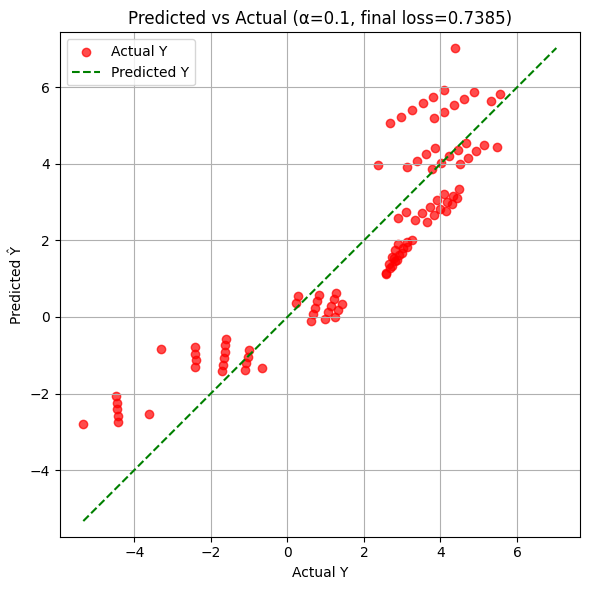

In [27]:
y_hat = X.dot(theta)

plt.figure(figsize=(6,6))
plt.scatter(y, y_hat, alpha=0.7, color= 'red',label= 'Actual Y')
lo = float(min(y.min(), y_hat.min()))
hi = float(max(y.max(), y_hat.max()))
plt.plot([lo, hi], [lo, hi], color= 'green', label= 'Predicted Y', linestyle="--")

plt.xlabel("Actual Y")
plt.ylabel("Predicted Ŷ")
plt.title(f"Predicted vs Actual (α={alpha}, final loss={cost_history[-1]:.4f})")
plt.grid(True)
plt.axis("equal")
plt.tight_layout()
plt.legend()
plt.show()

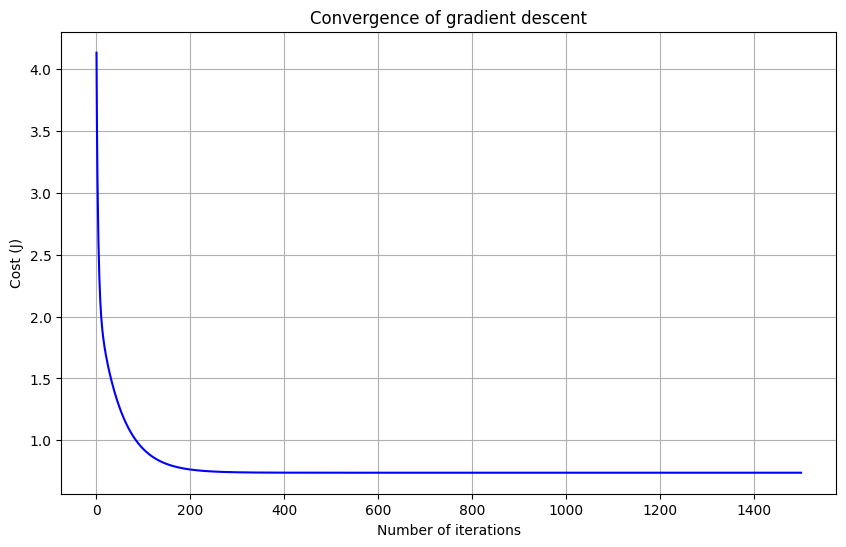

In [28]:
# plot the cost vs iteration
plt.plot(range(1, iterations + 1), cost_history, color='blue')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)

plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent')

plt.show()

In [31]:
X_new= ([1, 1, 1, 1],
        [1, 2, 0, 4],
        [1, 3, 2, 1])

Prediction_new = np.dot (X_new, theta)
Prediction_new

array([3.57740853, 0.24432097, 0.10253402])